## Chapter 9 Linear two class classification

# 9.8 Feature selection

In [1]:
## This code cell will not be shown in the HTML version of this notebook
# imports from custom library
import sys
sys.path.append('../../')
from mlrefined_libraries import superlearn_library as superlearn
from mlrefined_libraries import math_optimization_library as optlib

# demos for this notebook
plotter = superlearn.sparse_feature_selection_static
optimizers = optlib.optimizers
datapath = '../../mlrefined_datasets/superlearn_datasets/'
cost_lib = superlearn.cost_functions
classification_plotter = superlearn.classification_static_plotter.Visualizer();

# import autograd functionality to bulid function's properly for optimizers
import autograd.numpy as np

# import timer
from datetime import datetime 

# this is needed to compensate for %matplotlib notebook's tendancy to blow up images when plotted inline
%matplotlib notebook
from matplotlib import rcParams
rcParams['figure.autolayout'] = True

%load_ext autoreload
%autoreload 2

# 9.8.2 Feature selection via regularization

\begin{equation}
g\left(\mathbf{w}\right)= \frac{1}{P}\underset{p=1}{\overset{P}{\sum}}\text{log}\left(1 + e^{-\overset{\,}{y}_{p}\mathring{\mathbf{x}}_{p}^T\mathbf{w}^{\,}}\right) + \frac{\lambda}{P}\sum_{n=1}^N \left\vert w_n \right\vert
\end{equation}

In [2]:
# compute linear combination of input point (no bias)
def model(x,w):
    a = w[0] + np.dot(x.T,w[1:])
    return a.T

# the convex softmax cost function
def softmax_L1reg(w,x,y,lam,iter):
    # fetch mini-batch
    x_p = x[:,iter]
    y_p = y[:,iter]
    
    # compute standard softmax cost
    cost = np.sum(np.log(1 + np.exp(-y_p*model(x_p,w))))
    
    # add regularizer
    cost += lam*np.sum(np.abs(w[1:]))
    return cost/float(np.size(y_p))

# the convex softmax cost function
def softmax_L2reg(w,x,y,lam,iter):
    # fetch mini-batch
    x_p = x[:,iter]
    y_p = y[:,iter]
    
    # compute standard softmax cost
    cost = np.sum(np.log(1 + np.exp(-y_p*model(x_p,w))))
    
    # add regularizer
    cost += lam*np.sum((w[1:])**2)
    return cost/float(np.size(y_p))

# the counting cost function
def counting_cost(w,x,y,lam):
    cost = np.sum(np.abs(np.sign(model(x,w)) - y))
    return cost

# spam data

In [ ]:
word_freq_make:         continuous.
word_freq_address:      continuous.
word_freq_all:          continuous.
word_freq_3d:           continuous.
word_freq_our:          continuous.
word_freq_over:         continuous.
word_freq_remove:       continuous.
word_freq_internet:     continuous.
word_freq_order:        continuous.
word_freq_mail:         continuous.
word_freq_receive:      continuous.
word_freq_will:         continuous.
word_freq_people:       continuous.
word_freq_report:       continuous.
word_freq_addresses:    continuous.
word_freq_free:         continuous.
word_freq_business:     continuous.
word_freq_email:        continuous.
word_freq_you:          continuous.
word_freq_credit:       continuous.
word_freq_your:         continuous.
word_freq_font:         continuous.
word_freq_000:          continuous.
word_freq_money:        continuous.
word_freq_hp:           continuous.
word_freq_hpl:          continuous.
word_freq_george:       continuous.
word_freq_650:          continuous.
word_freq_lab:          continuous.
word_freq_labs:         continuous.
word_freq_telnet:       continuous.
word_freq_857:          continuous.
word_freq_data:         continuous.
word_freq_415:          continuous.
word_freq_85:           continuous.
word_freq_technology:   continuous.
word_freq_1999:         continuous.
word_freq_parts:        continuous.
word_freq_pm:           continuous.
word_freq_direct:       continuous.
word_freq_cs:           continuous.
word_freq_meeting:      continuous.
word_freq_original:     continuous.
word_freq_project:      continuous.
word_freq_re:           continuous.
word_freq_edu:          continuous.
word_freq_table:        continuous.
word_freq_conference:   continuous.
char_freq_;:            continuous.
char_freq_(:            continuous.
char_freq_[:            continuous.
char_freq_!:            continuous.
char_freq_$:            continuous.
char_freq_#:            continuous.
capital_run_length_average: continuous.
capital_run_length_longest: continuous.
capital_run_length_total:   continuous.


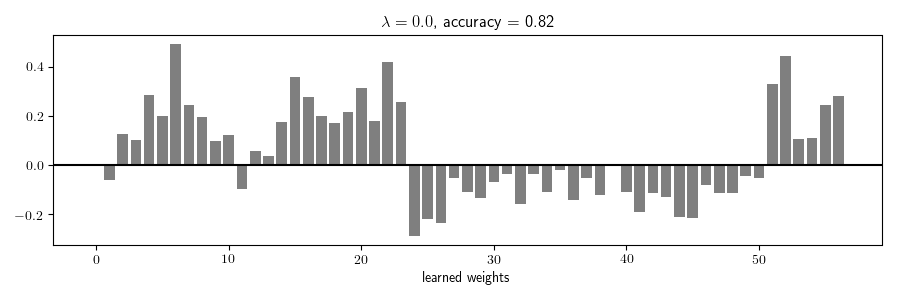
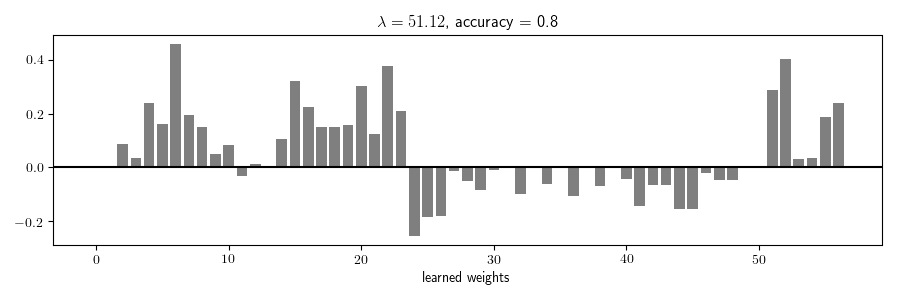
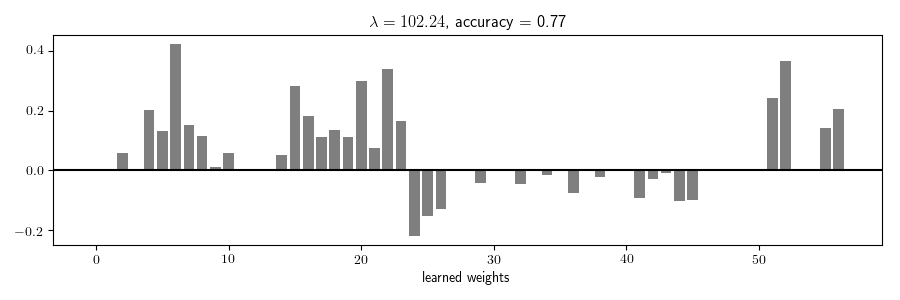
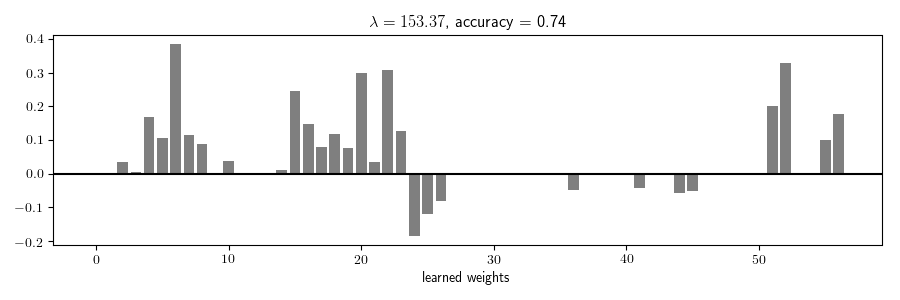
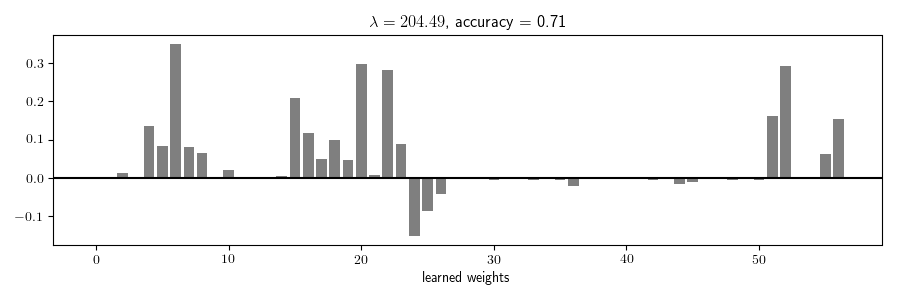
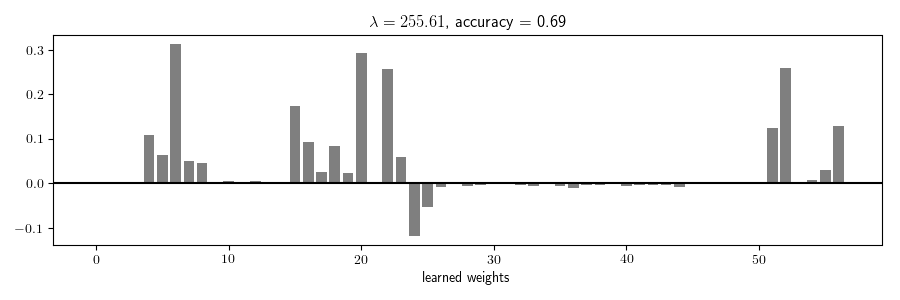
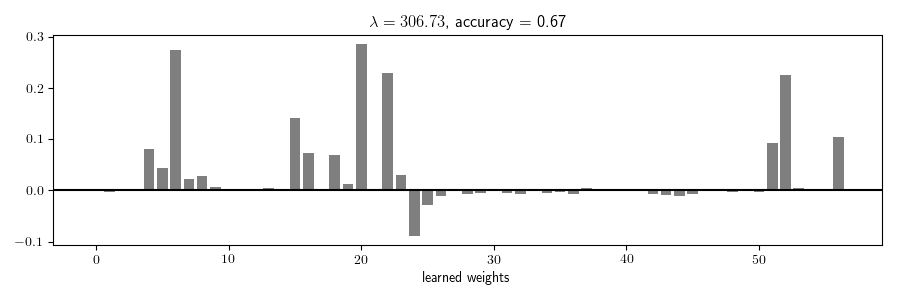
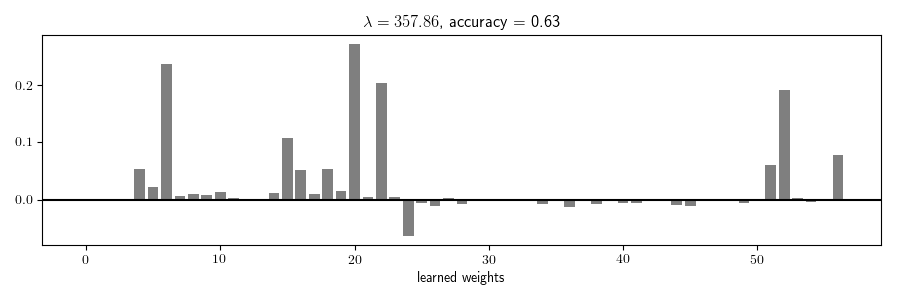
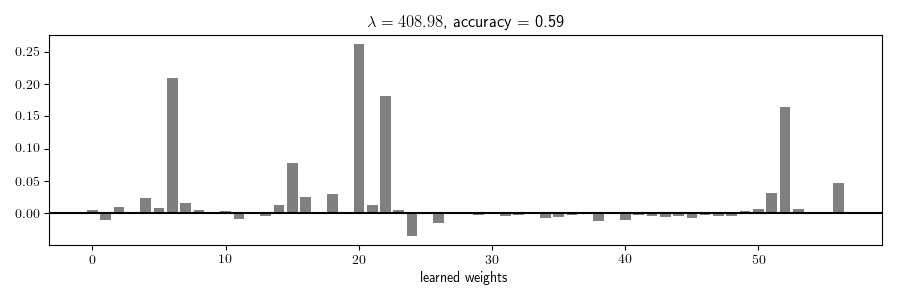
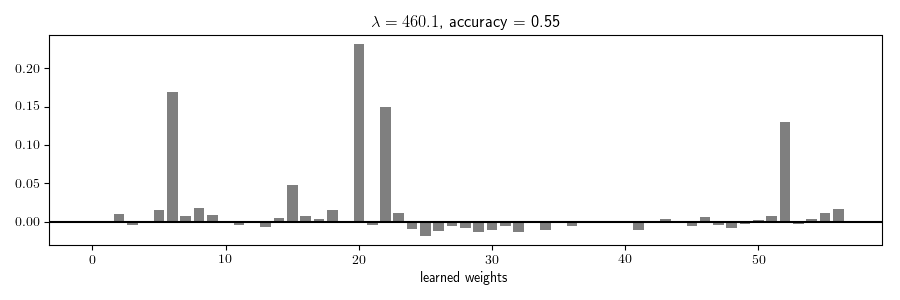

In [27]:
# load in dataset
csvname = datapath + 'spambase_data.csv'
data = np.loadtxt(csvname,delimiter = ',')
x = data[:-1,:]
y = data[-1:,:] 

# animator
animator = superlearn.sparse_feature_selection_animator
demo = animator.Visualizer(x,y,normalize = True)

# run animator
lams = [0,demo.y.size*10**(-2),demo.y.size*10**(-1)]
lams = np.linspace(0,demo.y.size*10**(-1),10)
g = softmax_L1reg
demo.compare_lams(g,lams,counter = counting_cost,max_its = 100,alpha = 10**(-1))

2238.0



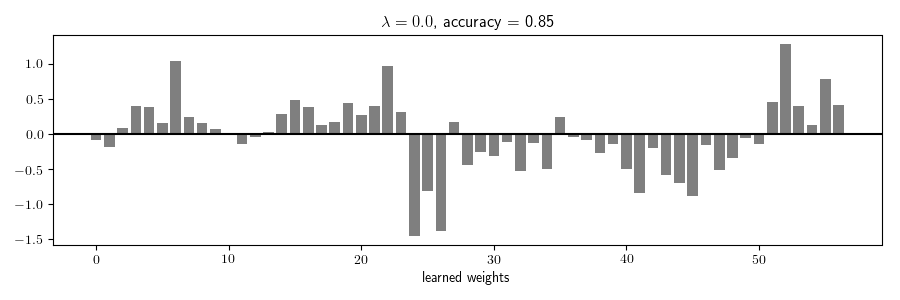
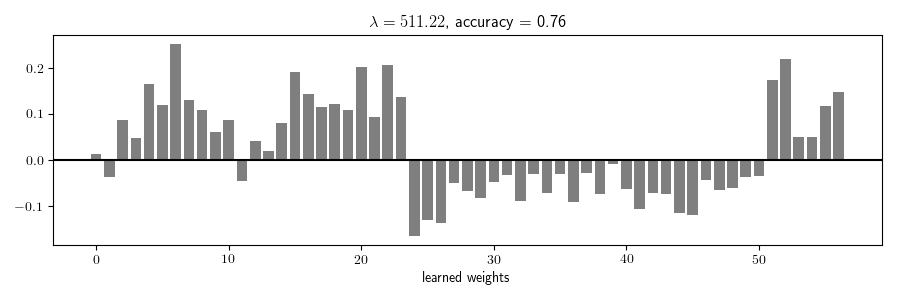
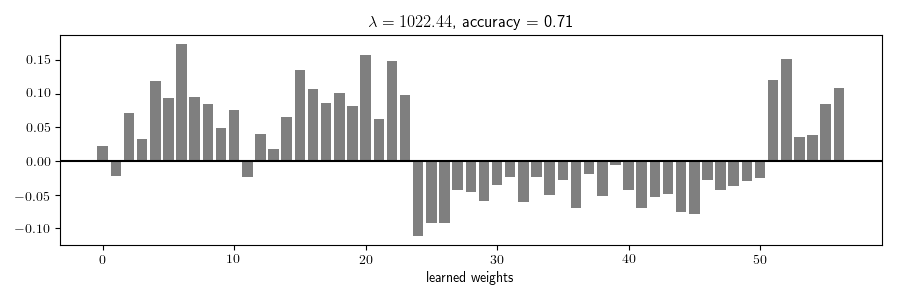
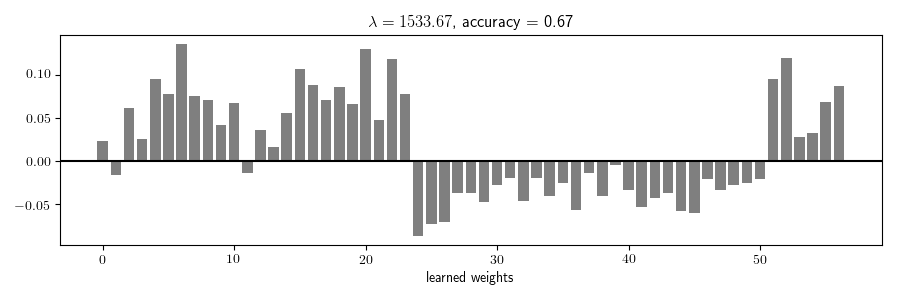
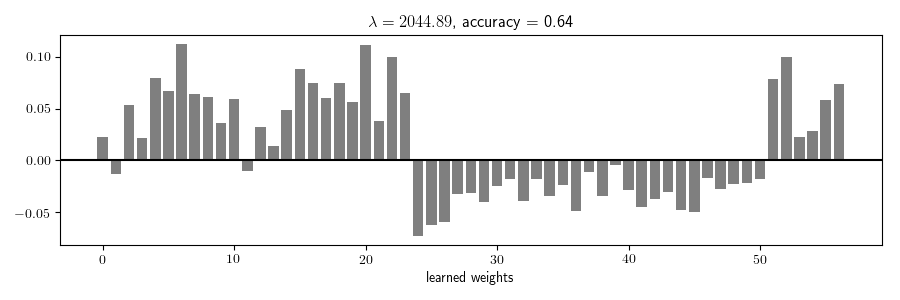
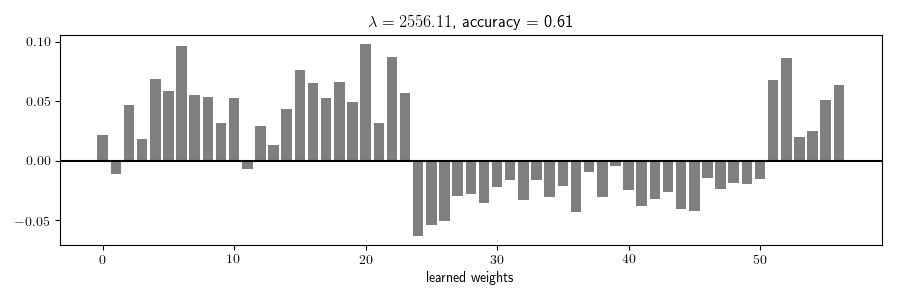
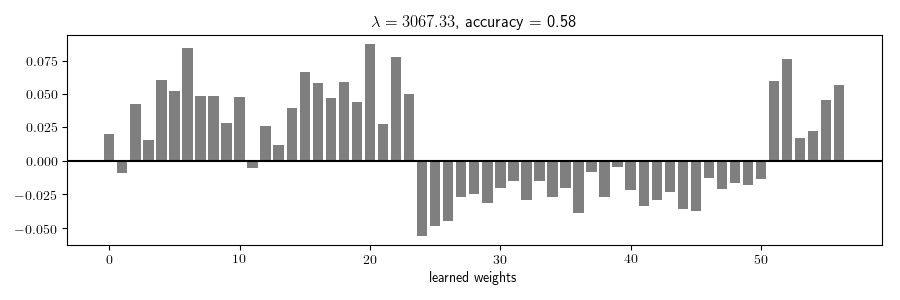
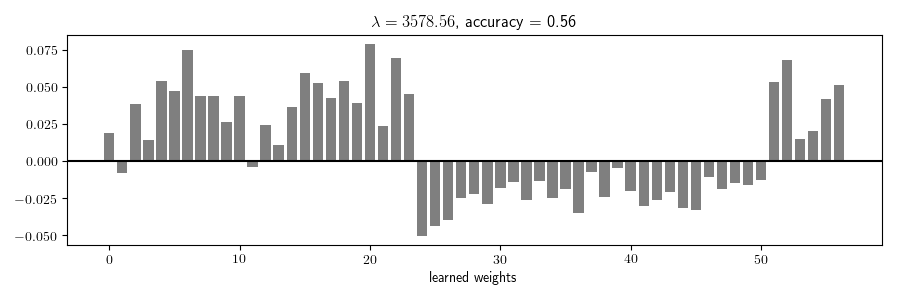
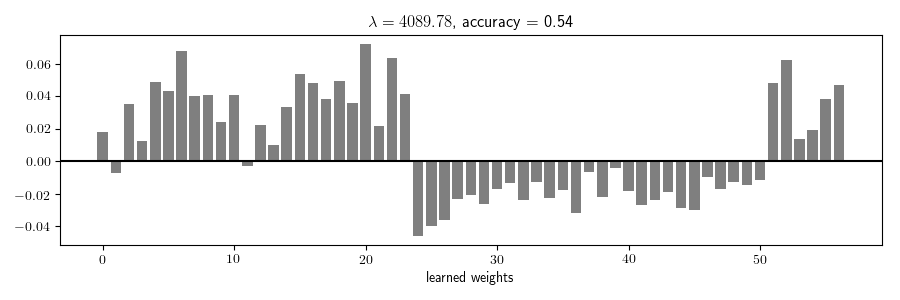
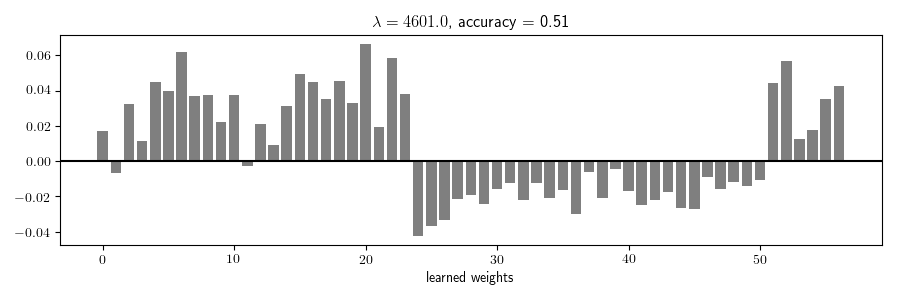

In [45]:
lams = [0,demo.y.size*10**(-2),demo.y.size*10**(-1)]
lams = np.linspace(0,demo.y.size*10**(0),10)
g = softmax_L2reg
demo.compare_lams(g,lams,counter = counting_cost,max_its = 1000,alpha = 10**(-1))

# Breast cancer

In [ ]:
4. Relevant information

	Features are computed from a digitized image of a fine needle
	aspirate (FNA) of a breast mass.  They describe
	characteristics of the cell nuclei present in the image.
	A few of the images can be found at
	http://www.cs.wisc.edu/~street/images/

	Separating plane described above was obtained using
	Multisurface Method-Tree (MSM-T) [K. P. Bennett, "Decision Tree
	Construction Via Linear Programming." Proceedings of the 4th
	Midwest Artificial Intelligence and Cognitive Science Society,
	pp. 97-101, 1992], a classification method which uses linear
	programming to construct a decision tree.  Relevant features
	were selected using an exhaustive search in the space of 1-4
	features and 1-3 separating planes.

	The actual linear program used to obtain the separating plane
	in the 3-dimensional space is that described in:
	[K. P. Bennett and O. L. Mangasarian: "Robust Linear
	Programming Discrimination of Two Linearly Inseparable Sets",
	Optimization Methods and Software 1, 1992, 23-34].


	This database is also available through the UW CS ftp server:

	ftp ftp.cs.wisc.edu
	cd math-prog/cpo-dataset/machine-learn/WDBC/

5. Number of instances: 569 

6. Number of attributes: 32 (ID, diagnosis, 30 real-valued input features)

7. Attribute information

1) ID number
2) Diagnosis (M = malignant, B = benign)
3-32)

Ten real-valued features are computed for each cell nucleus:

	a) radius (mean of distances from center to points on the perimeter)
	b) texture (standard deviation of gray-scale values)
	c) perimeter
	d) area
	e) smoothness (local variation in radius lengths)
	f) compactness (perimeter^2 / area - 1.0)
	g) concavity (severity of concave portions of the contour)
	h) concave points (number of concave portions of the contour)
	i) symmetry 
	j) fractal dimension ("coastline approximation" - 1)

Several of the papers listed above contain detailed descriptions of
how these features are computed. 

The mean, standard error, and "worst" or largest (mean of the three
largest values) of these features were computed for each image,
resulting in 30 features.  For instance, field 3 is Mean Radius, field
13 is Radius SE, field 23 is Worst Radius.

All feature values are recoded with four significant digits.

8. Missing attribute values: none

9. Class distribution: 357 benign, 212 malignant

In [32]:
from sklearn.datasets import load_breast_cancer
data = load_breast_cancer()
x = data.data.T
y = data.target

ind = np.argwhere(y == 0)
y[ind] = -1
y = y[np.newaxis,:]


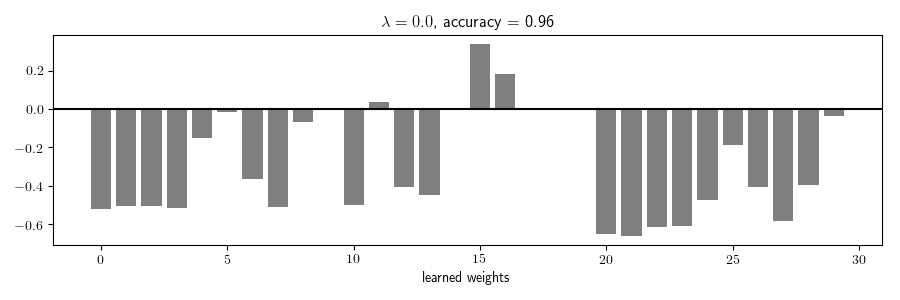
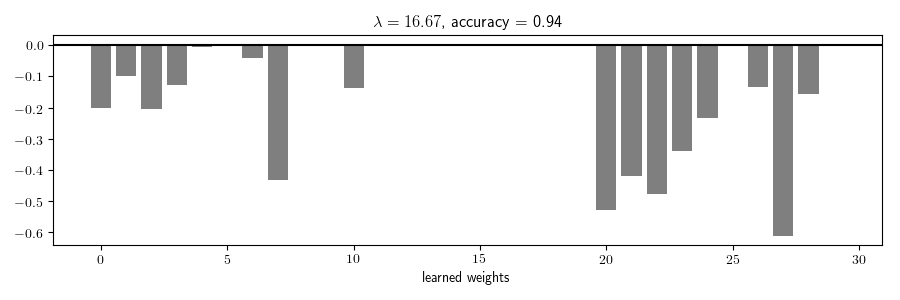
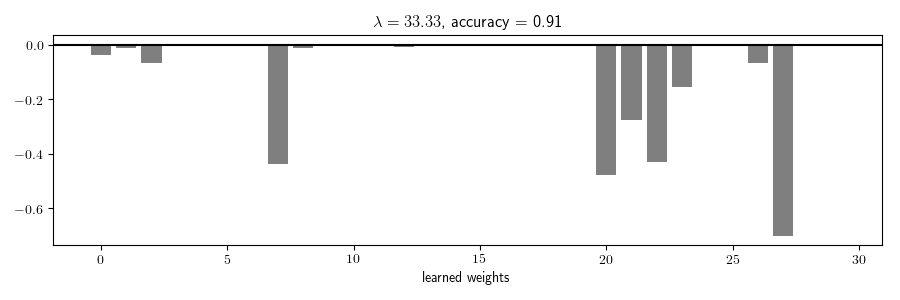
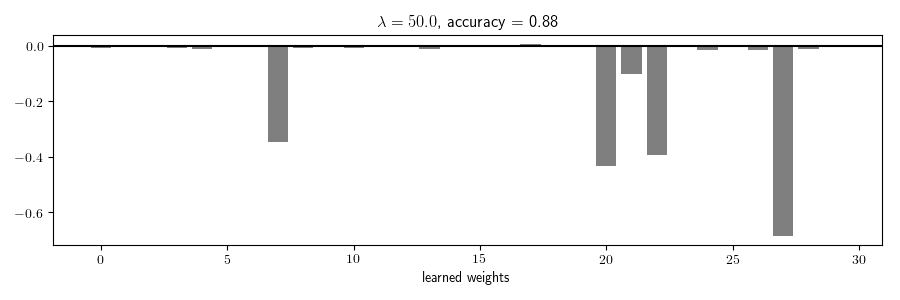
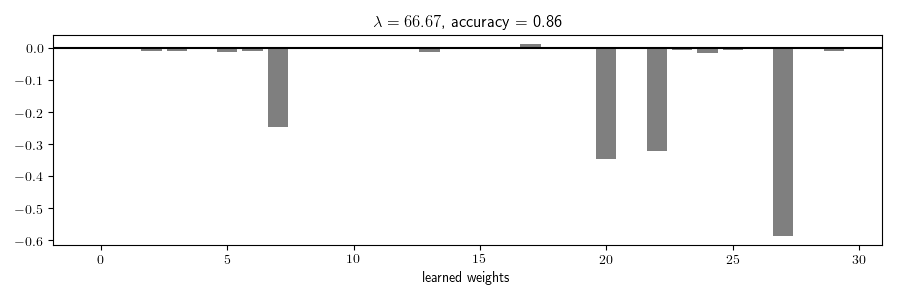
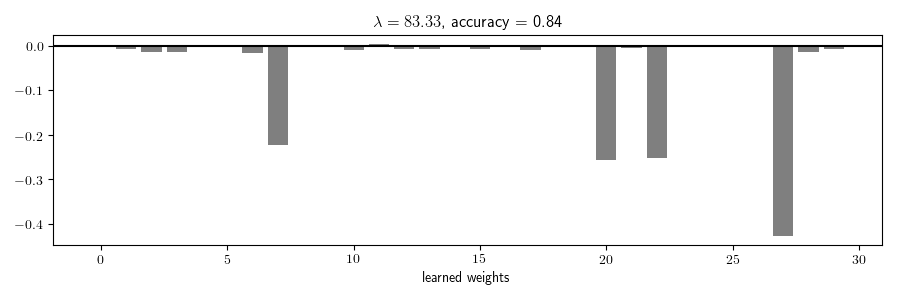
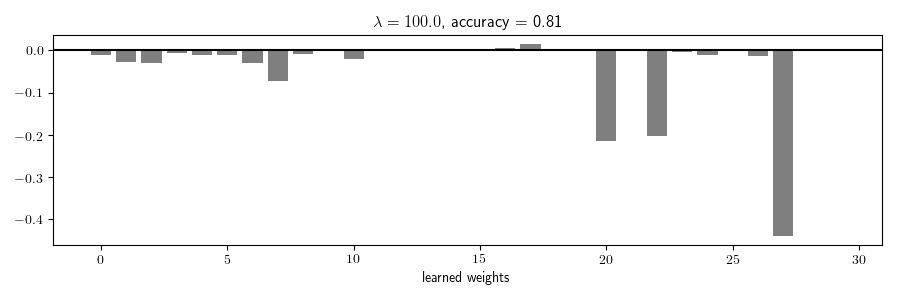
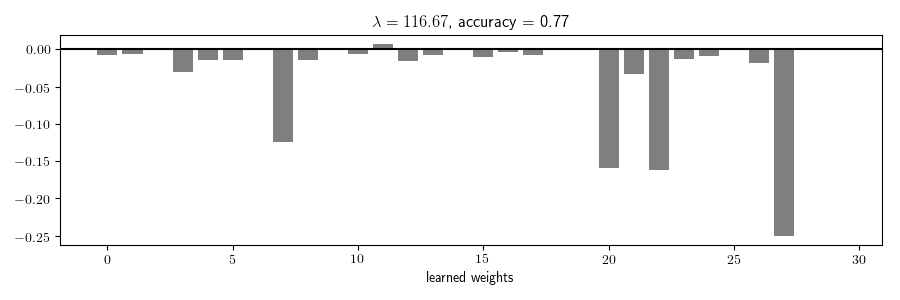
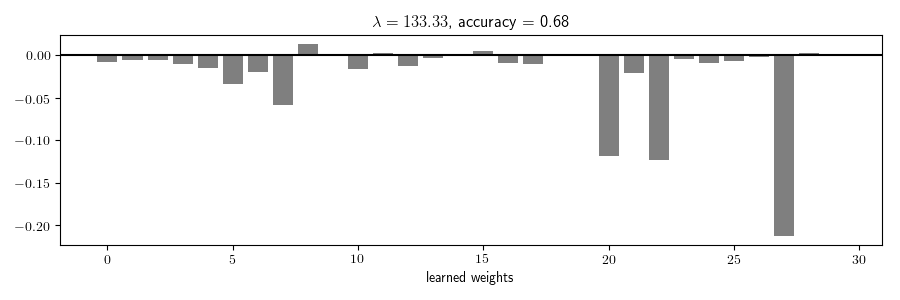
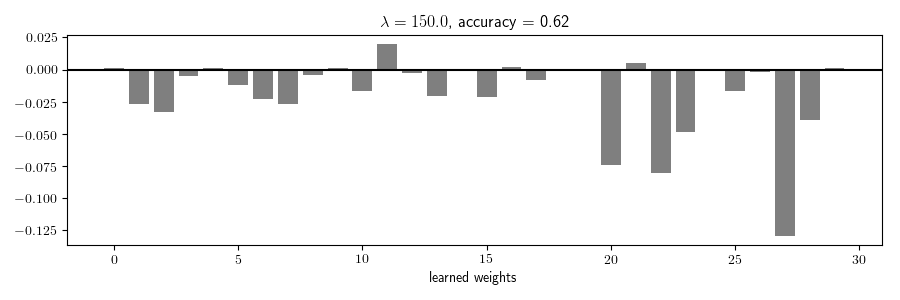

In [33]:
# animator
animator = superlearn.sparse_feature_selection_animator
demo = animator.Visualizer(x,y,normalize = True)

# run animator
lams = np.linspace(0,150,10)
g = softmax_L1reg
demo.compare_lams(g,lams,counter = counting_cost,max_its = 500,alpha = 10**(-1))

<IPython.core.display.Javascript object>


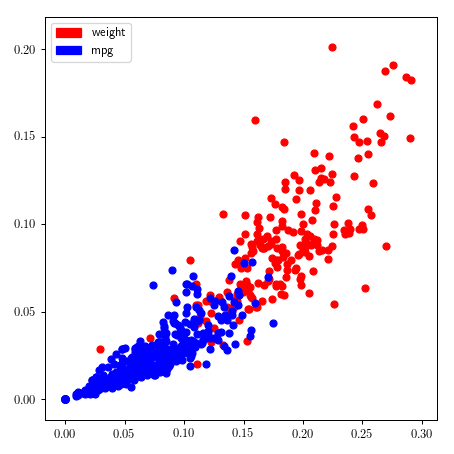

In [34]:
demo.plot_classif(27,7,labels=['weight','mpg'])

<IPython.core.display.Javascript object>


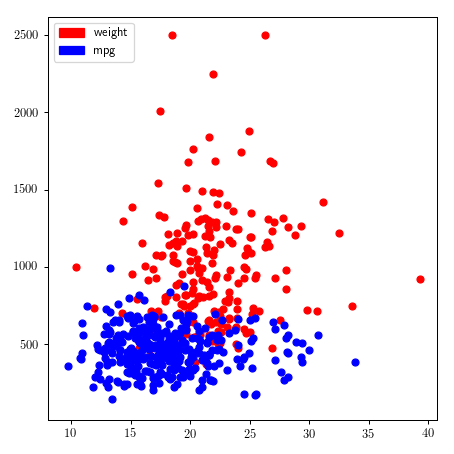

In [37]:
demo.plot_classif(1,3,labels=['weight','mpg'])


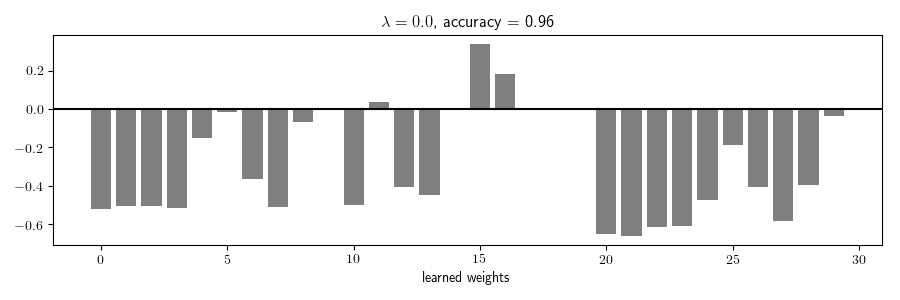
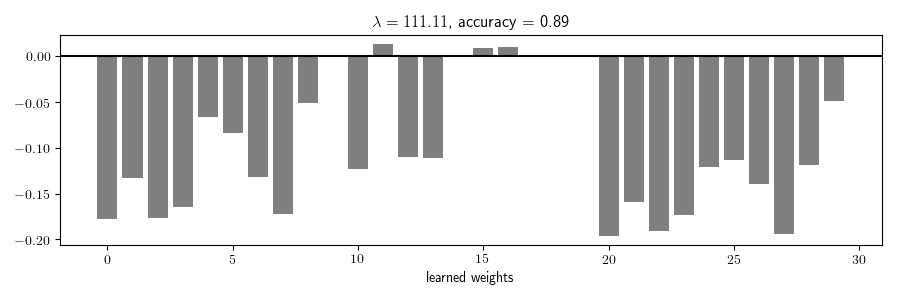
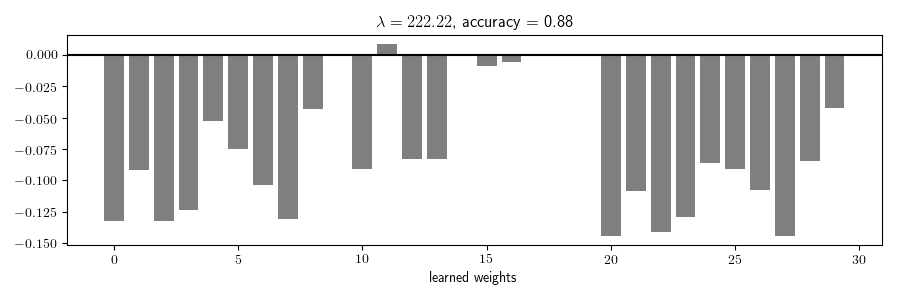
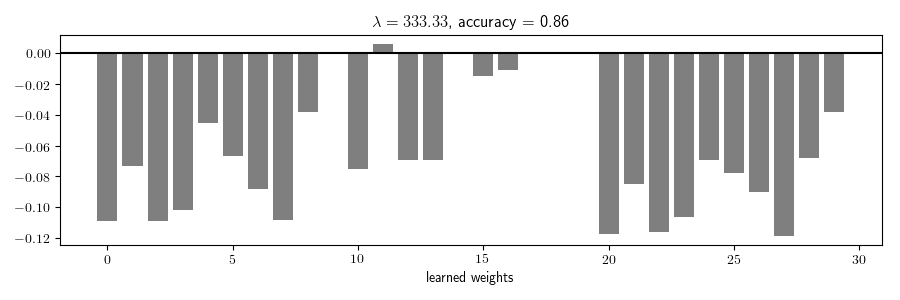
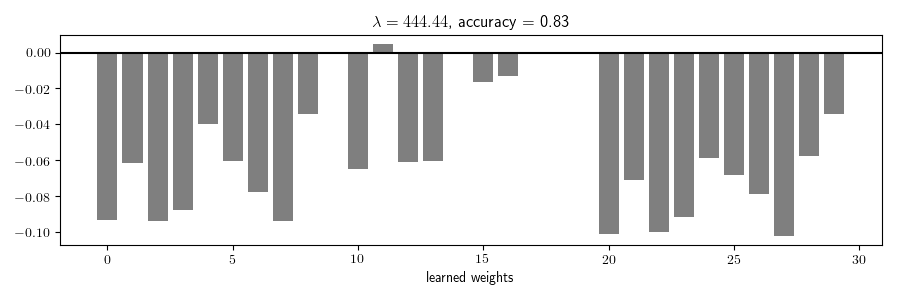
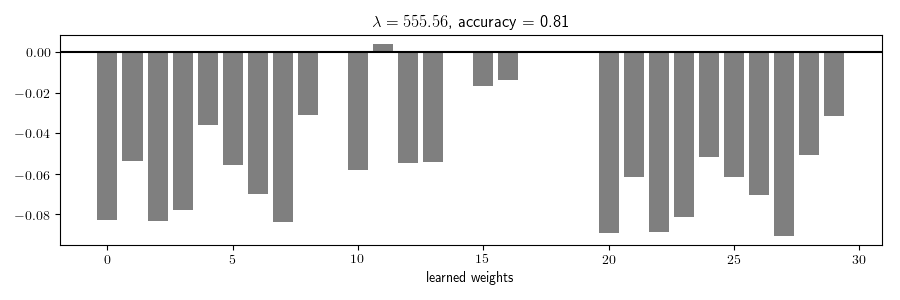
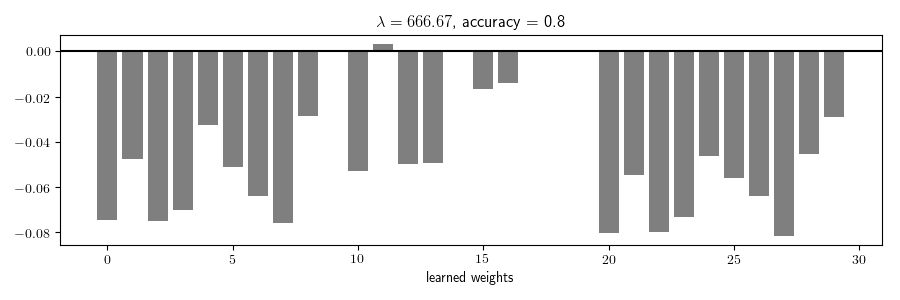
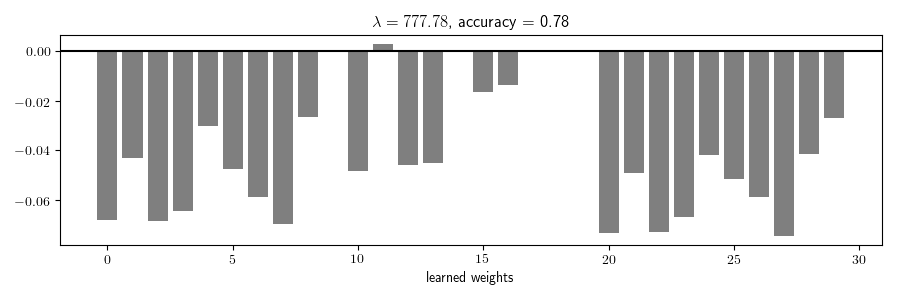
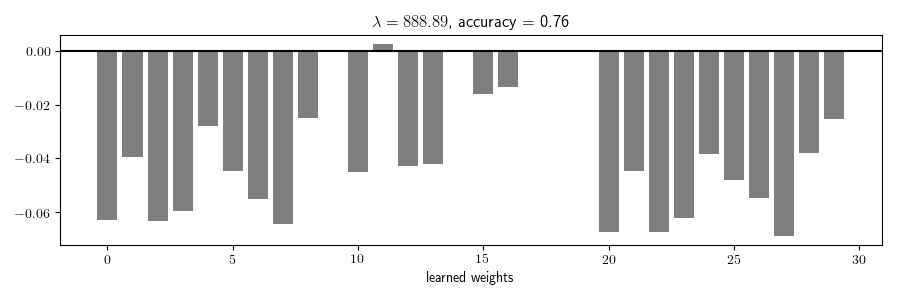
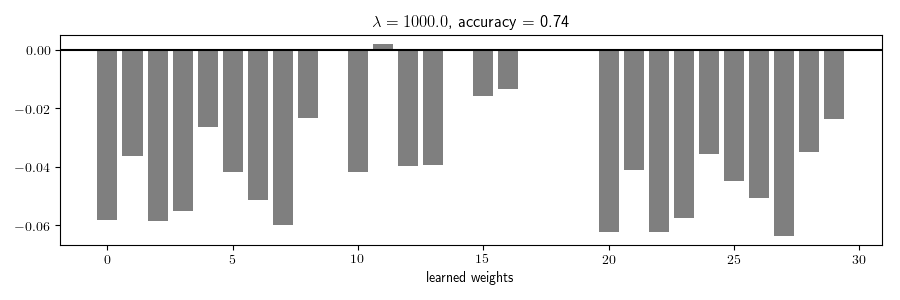

In [69]:
lams = np.linspace(0,1000,10)
g = softmax_L2reg
demo.compare_lams(g,lams,counter = counting_cost,max_its = 500,alpha = 10**(-1))

# IMBD sentiment

In [95]:
# load in dataset
csvname = datapath + 'census_data_w_encodings.csv'
data = np.loadtxt(csvname,delimiter = ',')
x = data[:-1,:]
y = data[-1:,:] 


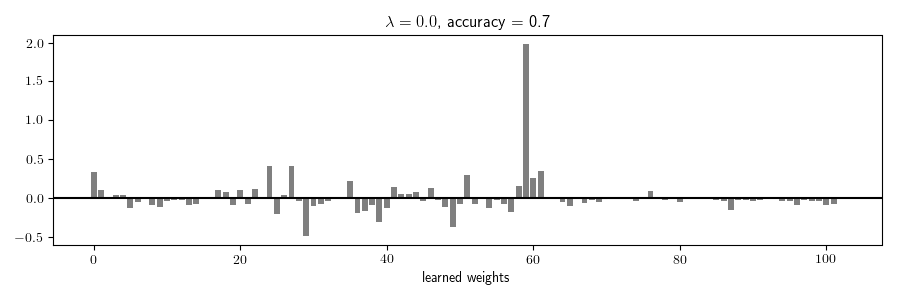
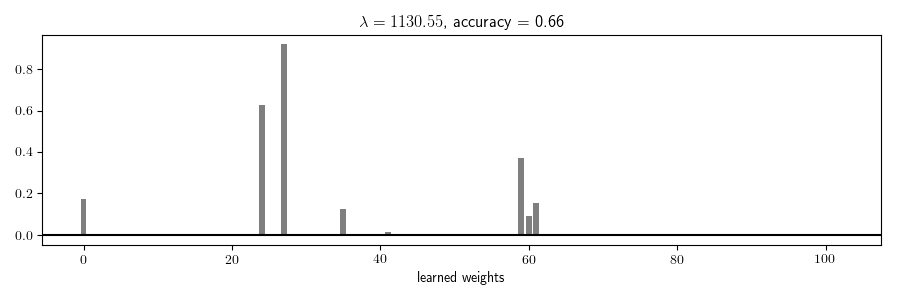
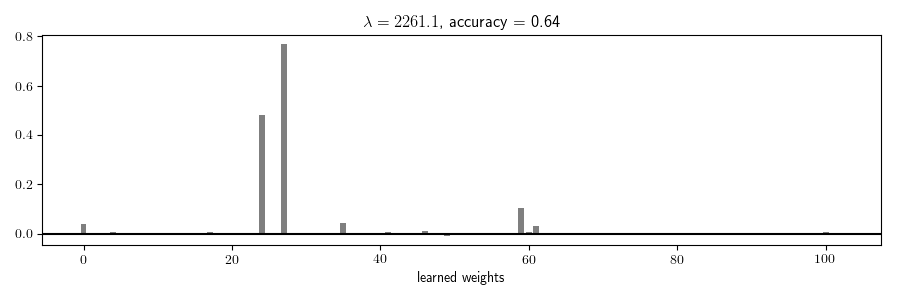
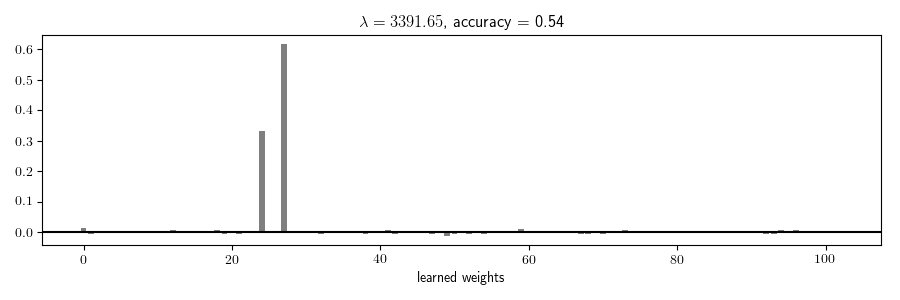
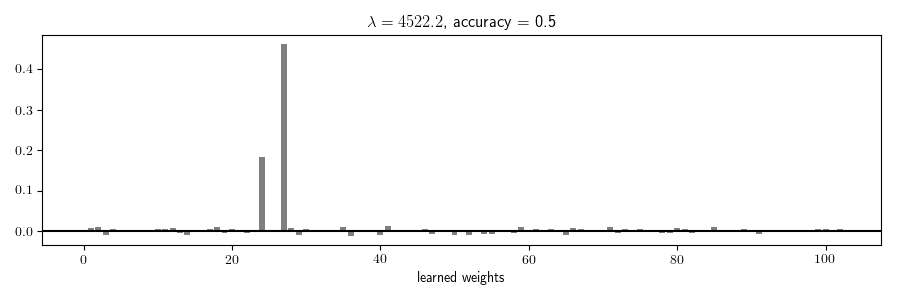

In [54]:
# animator
animator = superlearn.sparse_feature_selection_animator
demo = animator.Visualizer(x,y,normalize = True)

# run animator
lams = np.linspace(0,demo.y.size*10**(-1),5)
g = softmax_L1reg
demo.compare_lams(g,lams,counter = counting_cost,max_its = 3000,alpha = 10**(-1))

# 9.8.1 Feature Selection via L1-norm Regularization

In some machine learning applications, you may face the following scenario: You're given a gargantuan number of input features, of which only a small number actually contribute to the target variable you're trying to predict. For example in Genome-Wide Association (GWA) studies we aim to predict a quantitative biological trait like cholesterol level (**regression**) or diagnose a disease like breast cancer (**classification**) using more than 20,000 genetic markers (**features**) across the human genome. It is known among biologists that the vast majority of genes have little or no effect on the presence or severity of most diseases. L1-regualirized models are therefore used in situations like this, allowing only a few of the thousands of possible genes to be selected by the model (**sparse feature selection**), resulting in predictive models with enhanced accuracy and human interpretability.

<img src="../../mlrefined_images/superlearn_images/GWA.png" width=700 height=350/>



In what follows we use a simulated GWA dataset wherein gene expression levels of 20 patients with breast cancer and 20 healthy subjects are collected. For this simulated experiment we limit the number of genes to 100 and further assume that only two of those, **gene #33** and **gene #66**, are actually relevant in diagnosing breast cancer. Clearly, our machine learning model is not prevy to this last piece of information!

The parameter vector $\mathbf{w}$ now contains the logistic regression weights associated with each of the genes in our simulated data. Lets visualize this weight vector:

Note that although the 33rd and 66th entries of $\mathbf{w}$ (colored in darker grey in the figure above) have large magnitudes (desirable), the rest of the genes also contribute to the classifier via their non-zero weights (undesirable). Employing L1-regularized logistic regression we wish to arrive at a model that automatically selects the relevant genes, and those alone.
The L1-regularized logistic regression problem takes the form 

$$\begin{aligned}\underset{b,\mathbf{w}}{\mbox{minimize}} & \,\ \textrm{log}\left(1+e^{-y_{p}\left(b+\mathbf{x}_{p}^{T}\mathbf{w}\right)}\right)
+\lambda\left\Vert \mathbf{w}\right\Vert _{1}\end{aligned}$$

where the regularization parameter $\lambda$ controls how sparse we want the weight vector be.

Note that unlike the regular logistic regression model, to solve the L1-regularized version we cannot apply gradient descent, since the presence of the L1-norm makes the objective function non-differenetiable. Luckily, there are a host of numerical schemes that can be applied to problems like this. We use here one such algorithm - the accelerated proximal gradient method. See [here](pdfs/proximal_gradient_techniques.pdf) for more details regarding this algorithm.    

&copy; This material is not to be distributed, copied, or reused without written permission from the authors.